# Project: K-Nearest-Neighbor Regression Simulation
Mark Attwood

## Motivation
Consider a single dimension (variable) X. Obtain N = 100 iid samples x1, x2, ···of X
uniformly randomly between 1 and 10, and then obtain the corresponding y values as the
natural logarithm of x plus a Gaussian noise (mean 0, standard deviation 0.1), with different
points having different amounts of noise. 

Now use K-NN regression to obtain ˆy values (=
estimates of y) at x-values of 1, 3, 5, 7 and 9 for each of the following three schemes:

•the K neighbors contribute equally (separately for K = 1, 3, 50)

•each of the K neighbors has an influence that is inversely proportional to the distance
from the point (separately for K = 1, 3, 50)

•all the N points contribute, with each contribution proportional to $e^{−\frac{1}
{2}d^2}$
, where $d$ represents distance.

Print the numerical values of the $(x, \hat{y})$ pairs for each of the above cases (there should be a
total of $3 + 3 +1 = 7$ cases and 5 $(x, \hat{y})$ pairs for each case).
Also, plot the $(x′, y′)$ and $(x, \hat{y})$ points for each of these seven cases, where x′ is the point
(out of the 100 sample points) closest to x and y′ is the y-value of x′ (there should be a total
of 7 plots for this, each plot showing the $(x′, y′)$ and $(x, \hat{y})$ points). It is possible but unlikely
that x and x′ coincide.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(seed=42)

## Data Creation

In [3]:
# N=100 independently and identically distributed samples drawn from the uniform distribution on the interval [1, 10]
train_X = np.random.uniform(1, 10, 100)
print(type(train_X))
print(train_X[:5])

<class 'numpy.ndarray'>
[4.37086107 9.55642876 7.58794548 6.38792636 2.40416776]


In [4]:
# y values generated for the train_X values as ln(X)+epsilon, where epsilon is Normal w/ mean 0 and sd 0.1
train_y = [np.log(i) + np.random.normal(0, 0.1) for i in train_X]
train_y = np.asarray(train_y)
print(type(train_y))
print(train_y[:5])

<class 'numpy.ndarray'>
[1.48366474 2.22731336 2.03573694 1.65565281 0.85523661]


In [50]:
# Create an array of test values
test_X = np.array([1, 3, 5, 7, 9])
test_X

array([1, 3, 5, 7, 9])

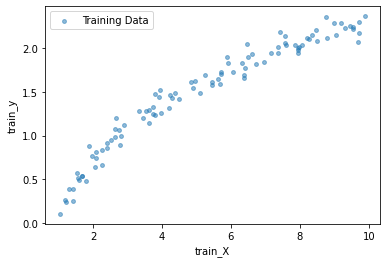

In [49]:
plt.scatter(train_X, train_y, alpha=0.5, s=15, label='Training Data')
plt.xlabel('train_X')
plt.ylabel('train_y')
_ = plt.legend()

## Creation of Helper Functions

In [7]:
def nearest_neighbor(test_x, x_train):
    '''
    Find the closest x value in a training set to a test_x numeric value. 
    Returns the closest training x value and its associated y value.
    '''
    dist = 10000000000
    x_value = 100000000
    for i in x_train:
        t_dist = np.absolute(test_x-i)
        if t_dist < dist:
            dist = t_dist
            x_value = i
    y_index = np.where(train_X == x_value)[0][0]
    y_value = train_y[y_index]
    return x_value, y_value

In [47]:
# A quick test for validation
nearest_neighbor(7, train_X)

(6.962700559185838, 1.8496286649871818)

In [9]:
def KNN_Regression_homework(wts='uniform', K_sizes=[1, 3, 50]):
    '''
    Pass in the wts argument for the KNeighborsRegressor and a list of K integer values (K_sizes).
    Function returns values and plots using the test_X variable and the model's predictions on those values.
    '''
    x_prime = []
    y_prime = []
    for i in test_X:
            u, v = nearest_neighbor(i, train_X)
            x_prime.append(u)
            y_prime.append(v)
    plt.scatter(x_prime, y_prime, s=60, label='Nearest Neighbors')
    estimates = {}
    size = 20
    alpha = 1
    for K in K_sizes:
        model = KNeighborsRegressor(n_neighbors = K, weights=wts)
        model.fit(train_X.reshape(-1,1), train_y)
        predicted = model.predict(test_X.reshape(-1,1))
        predicted_short = [round(i, 3) for i in predicted]
        estimates[K] = predicted_short  
        plt.scatter(test_X, predicted, s=size, alpha=alpha, label=f'Preds for K={K}') 
        _ = plt.legend()
        size += 50
        alpha -= .40

    for key in estimates:
        output = [(test_X[i], estimates[key][i]) for i in range(len(test_X))]
        print(f"K = {key}, Predictions: {output}")

## K Neighbors Contribute Equally
The default value for the weights argument of the KNeighborsRegressor object is "uniform" which will yield the above outcome.

K = 1, Predictions: [(1, 0.101), (3, 1.12), (5, 1.632), (7, 1.85), (9, 2.292)]
K = 3, Predictions: [(1, 0.199), (3, 1.003), (5, 1.556), (7, 1.875), (9, 2.246)]
K = 50, Predictions: [(1, 0.985), (3, 0.985), (5, 1.519), (7, 1.926), (9, 1.995)]


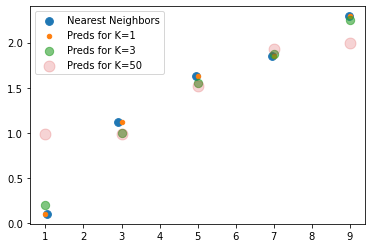

In [10]:
KNN_Regression_homework()

## Influence of K Neighbors is Inversely Proportional to the Distance from $x_0$
The 'distance' value for the weights argument of KNeighborsRegressor does exactly this. Results below.

K = 1, Predictions: [(1, 0.101), (3, 1.12), (5, 1.632), (7, 1.85), (9, 2.292)]
K = 3, Predictions: [(1, 0.149), (3, 1.039), (5, 1.584), (7, 1.864), (9, 2.263)]
K = 50, Predictions: [(1, 0.49), (3, 1.039), (5, 1.569), (7, 1.908), (9, 2.21)]


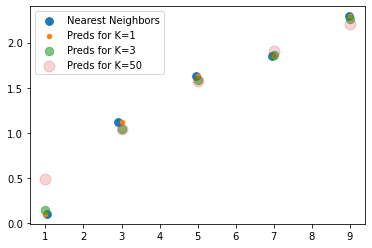

In [11]:
KNN_Regression_homework('distance')

## All N Points Contribute according to $e^{-\frac{1}{2}d^2}$

In [28]:
def radial_basis(d):
    return (np.e)**(-0.5*(d)**2)

K = 100, Predictions: [(1, 0.578), (3, 1.037), (5, 1.554), (7, 1.925), (9, 2.156)]


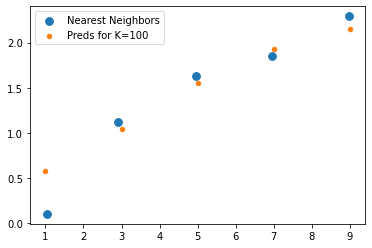

In [29]:
KNN_Regression_homework(radial_basis, [100])

## Extra Plots: 1000 points to Sketch Select Curves

In [41]:
def KNN_Regression_extra(wts='uniform', K_sizes=[100]):
    test_X_2 = np.arange(0, 10, .01)
    x_prime = []
    y_prime = []
    for i in test_X_2:
            u, v = nearest_neighbor(i, train_X)
            x_prime.append(u)
            y_prime.append(v)
    plt.scatter(x_prime, y_prime, s=15, alpha=0.1, label='Nearest Neighbors')
    estimates = {}
    size = 1
    alpha = 1
    for K in K_sizes:
        model = KNeighborsRegressor(n_neighbors = K, weights=wts)
        model.fit(train_X.reshape(-1,1), train_y)
        predicted = model.predict(test_X_2.reshape(-1,1))
        predicted_short = [round(i, 3) for i in predicted]
        estimates[K] = predicted_short  
        plt.scatter(test_X_2, predicted, s=size, alpha=alpha, label=f'Preds for K={K}') 
        _ = plt.legend()
        size += 50
        alpha -= .40

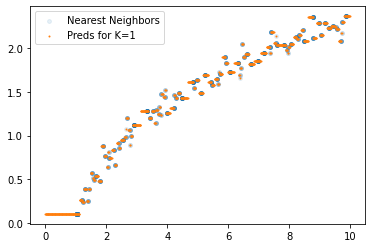

In [46]:
# over fit
KNN_Regression_extra(wts="uniform", K_sizes=[1])

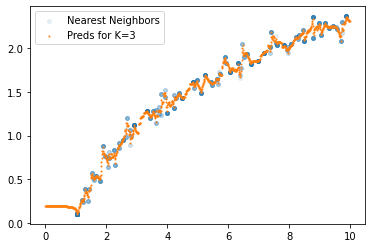

In [39]:
KNN_Regression_extra(wts="distance", K_sizes=[3])

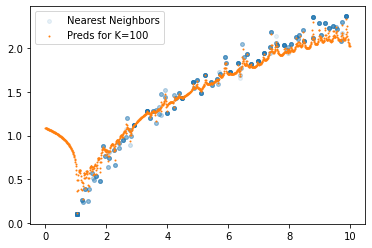

In [51]:
KNN_Regression_extra(wts="distance", K_sizes=[100])

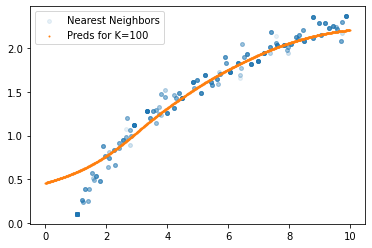

In [42]:
KNN_Regression_extra(radial_basis)